In [1]:
from matplotlib import pyplot as plt
import numpy as np
import PIL

In [9]:
data_infile = open('SIM_MAN_17__d0.9m_a15um_p62um_step-4.2_dith23.25_1.raw','rb')
ff_infile= open('Nylon_Air_SiC_2mm_2x_150_75_21kev_FF00_FS50um_Random__d0.75m_a15um_p62um_step-4.2_dith23.25_1.raw','rb')
data_array = np.fromfile(data_infile,dtype='float32',count=300*300)
ff_array = np.fromfile(ff_infile,dtype='float32',count=300*300)
data_image = PIL.Image.frombuffer("F",[300,300],data_array,'raw','F',0,1)
#ff_image = PIL.Image.frombuffer("F",[300,300],ff_array,'raw','F',0,1)

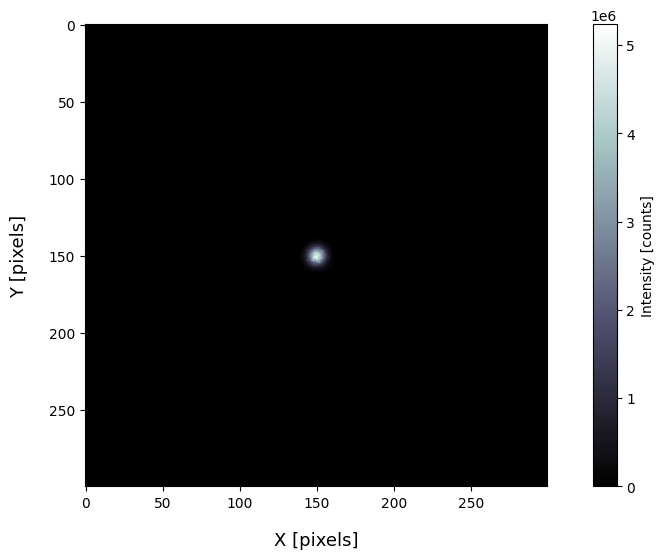

In [10]:
img1 = np.array(data_image.getdata())
#ff = np.array(ff_image.getdata())
img1=img1.reshape(300,300) 
#ff=ff.reshape(256,256)
img1 = img1 
#np.savetxt('Nylon_TxT_Files/In_line_FF_15.txt',img1)
fig2=plt.figure(figsize=(12,6))
ax1=fig2.add_subplot(111)
ax1.set_xlabel('X [pixels]', fontsize=13,labelpad=15)
ax1.set_ylabel('Y [pixels]', fontsize=13,labelpad=15)

p1= ax1.imshow(img1, cmap='bone')
cbar = fig2.colorbar(p1)
cbar.set_label('Intensity [counts]')


In [4]:
a=5.5*(10**(-5))
E=21
z=0.75
M=2
u=1
delta_m1=5.8317E-07
beta_m1=2.5298E-10
delta_muestra=2.99E-06
beta_muestra=2.58E-07
def Esp(name, a, delta, beta, E, z, M):
    frr = np.fft.fft2(name)  
    frr = np.fft.fftshift(frr) 
    Npixeles = len(name)
    array_dist=np.zeros((Npixeles,Npixeles)) 
    for i in range(0,Npixeles):
        for j in range(0, Npixeles):
            r=((2*np.pi*((Npixeles/2)-i))/(Npixeles*a))**2+((2*np.pi*((Npixeles/2)-j))/(Npixeles*a))**2 
            array_dist[i,j]=r 
    E_J=E*1.6*(10**(-16)) 
    h=10**(-34) 
    c=3*(10**(8)) 
    k=E_J/(h*c) 
    W=(delta*z)/(2*beta*k*M) 
    AA=np.ones((Npixeles,Npixeles)) 
    Q=AA+W*array_dist 
    A=frr/Q
    f_ishift = np.fft.ifftshift(A) 
    img_back = np.fft.ifft2(f_ishift) 
    img_back = np.abs(img_back) 
    A1=-(1/(2*k*beta))*np.log(img_back) 
    return A1

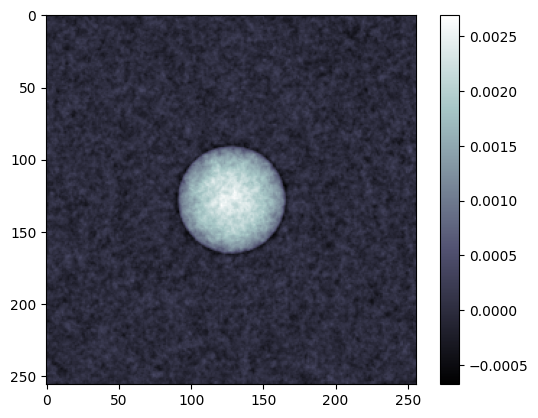

In [15]:
thickness_m1 = Esp(img1, a, delta_m1, beta_m1, E, z, M)
plt.imshow(thickness_m1, cmap='bone')
plt.colorbar()

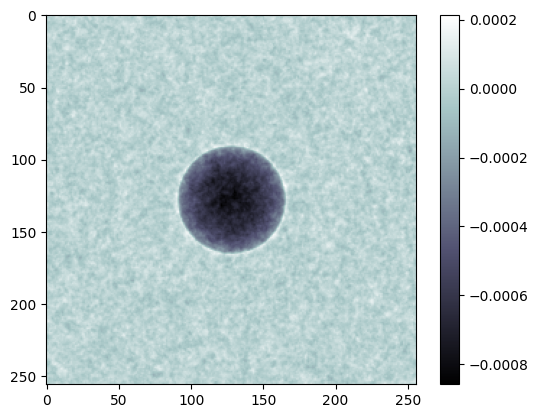

In [7]:
wavelength = 1.2398/(E*1000)
k = 2 * np.pi / wavelength
phase = -k*delta_muestra * thickness_m1
plt.imshow(phase, cmap='bone')
plt.colorbar()
np.savetxt('MIST_ALUMINA_RESULTS/phase_inline_15.txt', phase)

In [14]:
mu = 0.11629E+02 #cm^-1
thick = 125*4E-4#
att = np.exp(-mu * thick)
att,att*500*8



(0.5590871022426565, 2236.3484089706258)

TypeError: 'numpy.ndarray' object is not callable